In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('/Users/fixit/Desktop/iejra2lsq_flt.fits')
fits.info(image_file)

# This is pretty much just coppied and pasted from the guide 

Filename: \Users\fixit\Desktop\iejra2lsq_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     298   ()      
  1  SCI           1 ImageHDU       176   (513, 512)   float32   
  2  ERR           1 ImageHDU        48   (513, 512)   float32   
  3  DQ            1 ImageHDU        40   (513, 512)   int16   
  4  D2IMARR       1 ImageHDU        16   (64, 32)   float32   
  5  D2IMARR       2 ImageHDU        16   (64, 32)   float32   
  6  WCSDVARR      1 ImageHDU        16   (64, 32)   float32   
  7  WCSDVARR      2 ImageHDU        16   (64, 32)   float32   


(512, 513)


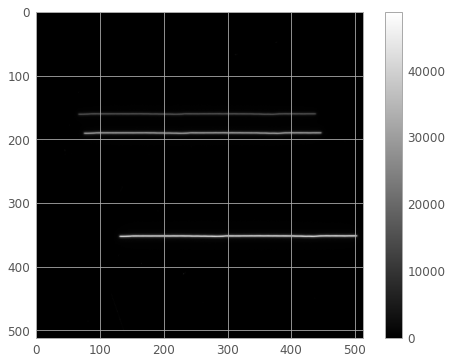

In [2]:
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

#This is also pretty much just coppied and pasted

In [3]:
image_file = get_pkg_data_filename('/Users/fixit/Desktop/iejra2lsq_flt.fits')
hdul = fits.open(image_file)
hdul[0].header

#This is courtesy of Maura

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2021-09-27' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    7 / Number of standard extensions                  
FILENAME= 'iejra2lsq_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [4]:
expstart = hdul[0].header['EXPSTART']
expend = hdul[0].header['EXPEND']
exptime = hdul[0].header['EXPTIME']

#Ths is courtesy of Trevor, but I had to change it from 'hdulist' to 'hdul'

In [5]:
print(expstart, expend, exptime) #This is just to check that it worked :)

59483.63769035 59483.63794496 22.0


In [40]:
(expstart + expend)/2

59483.637817655

In [43]:
np.median([expstart, expend])

59483.637817655

(array([[512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  -73.091965,  4814.6934  ,  9702.479   , 14590.264   ,
        19478.049   , 24365.834   , 29253.621   , 34141.406   ,
        39029.19    , 43916.977   , 48804.76    ], dtype=float32),
 <a list of 513 Lists of Patches objects>)

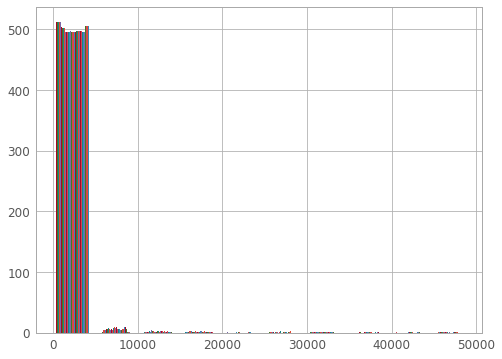

In [7]:
plt.hist(image_data)

In [8]:
image_data

array([[-6.0466356 , -3.3808355 , -2.308521  , ..., -4.5968227 ,
        -6.023499  ,  2.7505212 ],
       [-2.2573168 ,  0.3039035 , -2.4421606 , ...,  1.9427482 ,
        -5.167463  , -0.7907589 ],
       [ 3.8389304 , -1.1620663 ,  4.26497   , ...,  0.36358547,
         5.583905  ,  4.6138773 ],
       ...,
       [-1.0557768 , -0.48651642,  3.0483305 , ..., -2.0901544 ,
         1.8440837 ,  2.7269793 ],
       [-0.11850564, -1.9568294 ,  4.4917064 , ...,  3.3814423 ,
         0.48102826,  3.3151639 ],
       [-0.37083828,  2.7084463 , -0.91689074, ..., -2.8355641 ,
         0.59530276,  2.2735612 ]], dtype=float32)

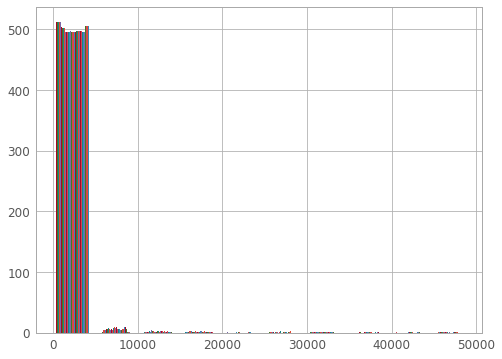

In [37]:
#Attempt at a histogram
plt.hist(image_data)
plt.show()

<ipython-input-39-ffd5d354fad4>:6: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(x))
C:\Users\fixit\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\fixit\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


11949.525390625


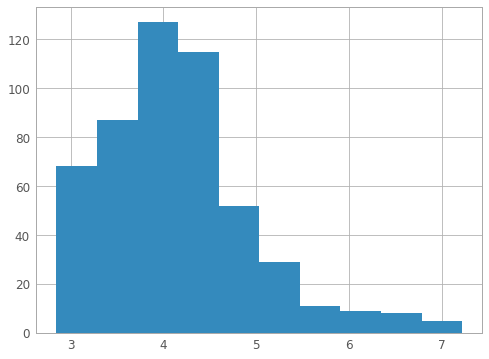

In [39]:
x = np.zeros(len(image_data))
for n in range(len(image_data)):
        x[n] = np.sum(image_data[n][:])
    

plt.hist(np.log10(x))
print(np.median(x))

In [26]:
len(image_data[1])

513

In [29]:
print(image_data[0])

[-6.04663563e+00 -3.38083553e+00 -2.30852103e+00 -5.29289436e+00
 -1.35135374e+01 -4.56965029e-01 -4.54697037e+00 -6.36909103e+00
 -6.44150162e+00  5.27199268e-01 -3.33247924e+00 -6.18719721e+00
 -1.45714688e+00 -5.09003401e+00 -4.16730690e+00 -1.44449415e+01
 -2.81402397e+00 -6.46596193e+00  1.53654885e+00 -1.95392215e+00
 -1.99556589e+00 -2.69485474e-01  2.22821665e+00 -5.12428713e+00
 -6.80829763e+00 -1.85371220e+00  1.44212759e+00  4.16729450e+00
 -1.23418570e+01 -7.45913219e+00  3.09117270e+00 -2.24828959e+00
 -1.98167050e+00  1.59093308e+00  8.39234650e-01 -1.64031899e+00
  3.22941852e+00 -7.35195494e+00 -3.63329959e+00 -5.19383192e+00
  2.09906626e+00  5.01156378e+00  7.82904816e+00  2.89177704e+00
 -2.34613836e-01 -4.90459776e+00 -5.58034611e+00 -9.51594257e+00
 -5.36110735e+00 -4.09245300e+00 -4.76353550e+00  3.65669465e+00
 -5.01115417e+00 -3.57217336e+00  3.82035971e+00 -7.46438122e+00
 -5.96052742e+00  3.91175652e+00 -4.05847740e+00 -7.39832735e+00
 -2.06957054e+00 -9.49883

In [31]:
print(image_data[1])

[-2.25731683e+00  3.03903490e-01 -2.44216061e+00  6.98208427e+00
 -2.38968945e+00  6.07394123e+00 -3.88919258e+00  6.37156105e+00
  1.77937460e+00 -2.09037447e+00  1.92071319e+00 -7.01383734e+00
  4.82094288e+00  7.49549055e+00 -1.10551846e+00  7.76145697e-01
 -1.42529106e+00  3.13370562e+00  8.32731438e+00 -6.70882750e+00
  6.57643700e+00 -8.38560867e+00 -2.48462653e+00  1.43773508e+00
  6.58721268e-01 -7.88661718e-01 -1.45252615e-01 -2.17433310e+00
  8.45229435e+00 -2.45267320e+00 -1.49377191e+00  3.39621449e+00
 -2.64889026e+00  1.18023455e+00 -9.25962813e-03  6.75456429e+00
 -2.75479889e+00  6.01808739e+00 -4.39572573e+00 -5.06941020e-01
  2.01618314e+00  2.58199036e-01 -7.64953792e-01 -2.03936982e+00
  5.38160276e+00  7.01323748e-01  3.61927414e+00  2.10515046e+00
  3.37018323e+00 -1.43454984e-01  3.96614265e+00  3.85319042e+00
  5.47773361e+00  3.66449237e+00  2.15270853e+00 -6.84030008e+00
  7.73039007e+00  5.44519615e+00 -1.34941971e+00  1.28171360e+00
  7.25611782e+00  2.57632

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from astropy.stats import sigma_clip
from scipy import optimize, signal
import pickle
import warnings
warnings.filterwarnings("ignore")

from astropy.utils.data import get_pkg_data_filename
fpath='/Users/fixit/Desktop/Python/Research/LTT1445_fits_files/Test/Tes2/'
#fpath='/Users/fixit/Desktop/Python/Research/LTT1445_fits_files/Test/'  #all files
mist = glob.glob(fpath+'iejr0*') #29th
#mist = glob.glob(fpath+'iejra*') #26th
mist = sorted(mist)
image_file = get_pkg_data_filename(mist[0])
image_data = fits.getdata(image_file, ext=0)
plt.hist(image_data, 10, range[0,500])
plt.show()


TypeError: 'type' object is not subscriptable